In [1]:
import numpy as np

filepath = "/Users/awojdyla/Downloads/ssrl_bl10-1_M0_mirror_Ux_Data_02-25-26.csv"
#note:  you may want to remove manually trailing commas in the file.

# Read numeric grid from CSV (non-numeric entries become NaN)
raw = np.genfromtxt(filepath, delimiter=",", skip_header=1, dtype=float)

# First column = x coordinates, remaining columns = 2D height/error map
x_mm = raw[:, 0]
H_mm = raw[:, 1:]

# First row (excluding first cell) = y coordinates
header = np.genfromtxt(filepath, delimiter=",", max_rows=1, dtype=str)
y_mm = header[1:].astype(float)

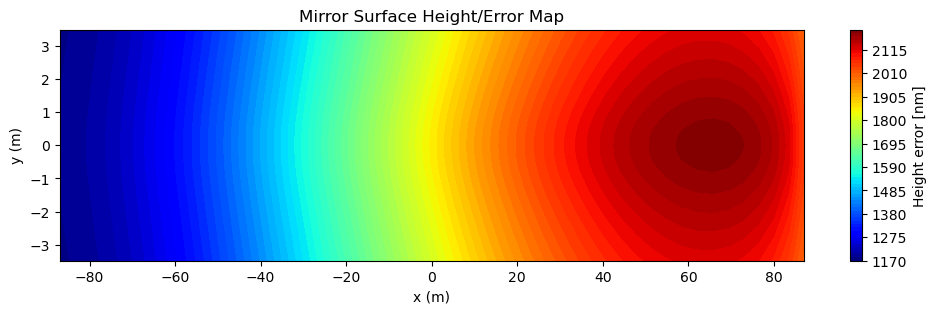

In [2]:
# doesn't work, probably a matplotlib verion bug.
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.contourf(x_mm, y_mm, H_mm.T*1e6, levels=100, cmap="jet")
plt.colorbar(label="Height error [nm]")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Mirror Surface Height/Error Map")
plt.show() 

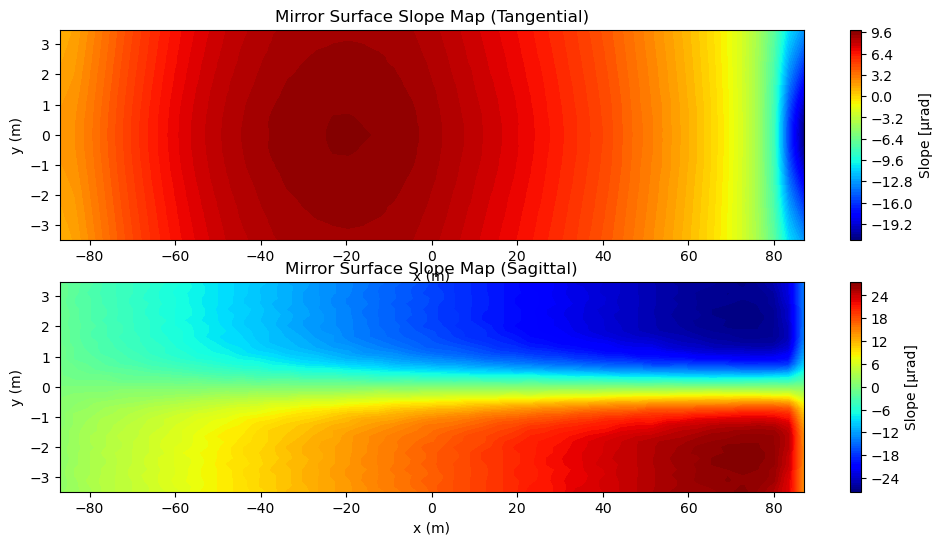

In [3]:
slope_tan_rad = np.gradient(H_mm, x_mm, axis=0)  # Gradient along x
slope_sag_rad = np.gradient(H_mm, y_mm, axis=1)  # Gradient along y

plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.contourf(x_mm, y_mm, slope_tan_rad.T*1e6, levels=100, cmap="jet")
plt.colorbar(label="Slope [µrad]")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Mirror Surface Slope Map (Tangential)")
plt.subplot(2,1,2)
plt.contourf(x_mm, y_mm, slope_sag_rad.T*1e6, levels=100, cmap="jet")
plt.colorbar(label="Slope [µrad]")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Mirror Surface Slope Map (Sagittal)")
plt.show() 


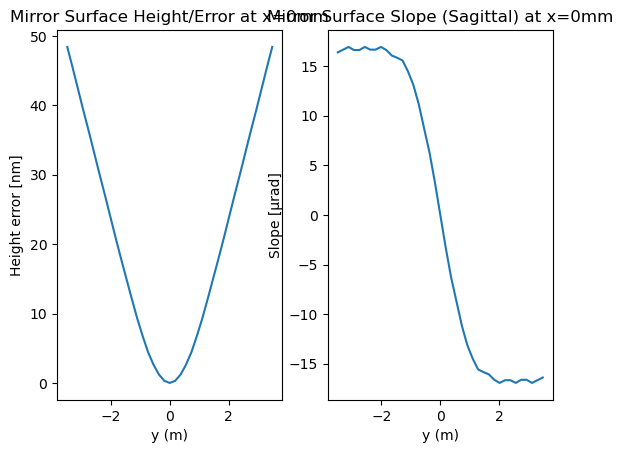

In [4]:
plt.subplot(1,2,1)
plt.plot(y_mm, -(H_mm[25,:]-np.max(H_mm[25,:]))*1e6)
plt.xlabel("y (m)")
plt.ylabel("Height error [nm]")
plt.title("Mirror Surface Height/Error at x=0mm")
plt.subplot(1,2,2)
plt.plot(y_mm, slope_sag_rad[25,:]*1e6)
plt.xlabel("y (m)")
plt.ylabel("Slope [µrad]")
plt.title("Mirror Surface Slope (Sagittal) at x=0mm")
plt.show()


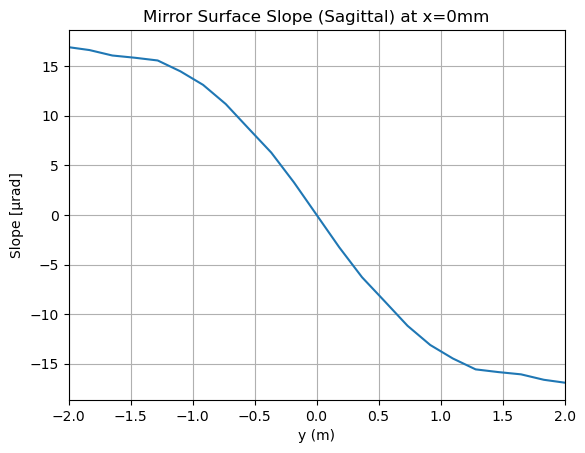

In [6]:
plt.plot(y_mm, slope_sag_rad[25,:]*1e6)
plt.xlabel("y (m)")
plt.ylabel("Slope [µrad]")
plt.title("Mirror Surface Slope (Sagittal) at x=0mm")
plt.xlim((-2,2))
plt.grid()
plt.show()
